In [1]:
# from IPython.core.display import display, HTML 
# display(HTML('<style>.container {​​​​​​​ width:90% !important; }​​​​​​​</style>'))

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import missingno as msno
import re

# import xlrd
import warnings
warnings.filterwarnings('ignore')
# plt.style.use('seaborn') #그래프 스타일

plt.rc('font', family='AppleGothic') #그래프 한글
matplotlib.rcParams['axes.unicode_minus'] = False #마이너스값

#화면에 출력되는 데이터 갯수
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 200)

%config InlineBackend.figure_format='retina'
%matplotlib inline


from sklearn.metrics import classification_report, confusion_matrix
from fastai.vision.all import *
from sklearn.model_selection import train_test_split

In [2]:
#image 주소 dataframe 으로 만들기

import pandas as pd
data = [] #
labels = [] # label

for root, dirs, files  in os.walk('/Users/kimsy/DataScience/dataset/fm_img/horizontal/train'):
    if 'good' in root or 'ng' in root:
        for file in files:
            if file.endswith('.jpg')or file.endswith('.png'):
                data.append(os.path.join(root, file))
                labels.append('good' if 'good' in root else 'ng')


df = pd.DataFrame({'path':data, 'label':labels})
df
                    


,path,label
0,/Users/kimsy/DataScience/dataset/fm_img/horizontal/train/ng/2022-12-27-152122551.jpg,ng
1,/Users/kimsy/DataScience/dataset/fm_img/horizontal/train/ng/2022-12-27-162306690.jpg,ng
2,/Users/kimsy/DataScience/dataset/fm_img/horizontal/train/ng/2022-12-27-163254599.jpg,ng
3,/Users/kimsy/DataScience/dataset/fm_img/horizontal/train/ng/2022-12-27-163932958.jpg,ng
4,/Users/kimsy/DataScience/dataset/fm_img/horizontal/train/ng/2022-12-27-162748046.jpg,ng
...,...,...
915,/Users/kimsy/DataScience/dataset/fm_img/horizontal/train/good/2022-12-27-150455831.jpg,good
916,/Users/kimsy/DataScience/dataset/fm_img/horizontal/train/good/2022-12-27-150056856.jpg,good
917,/Users/kimsy/DataScience/dataset/fm_img/horizontal/train/good/2022-12-27-150223726.jpg,good
918,/Users/kimsy/DataScience/dataset/fm_img/horizontal/train/good/2022-12-27-150524574.jpg,good


In [3]:
from fastai.vision import *

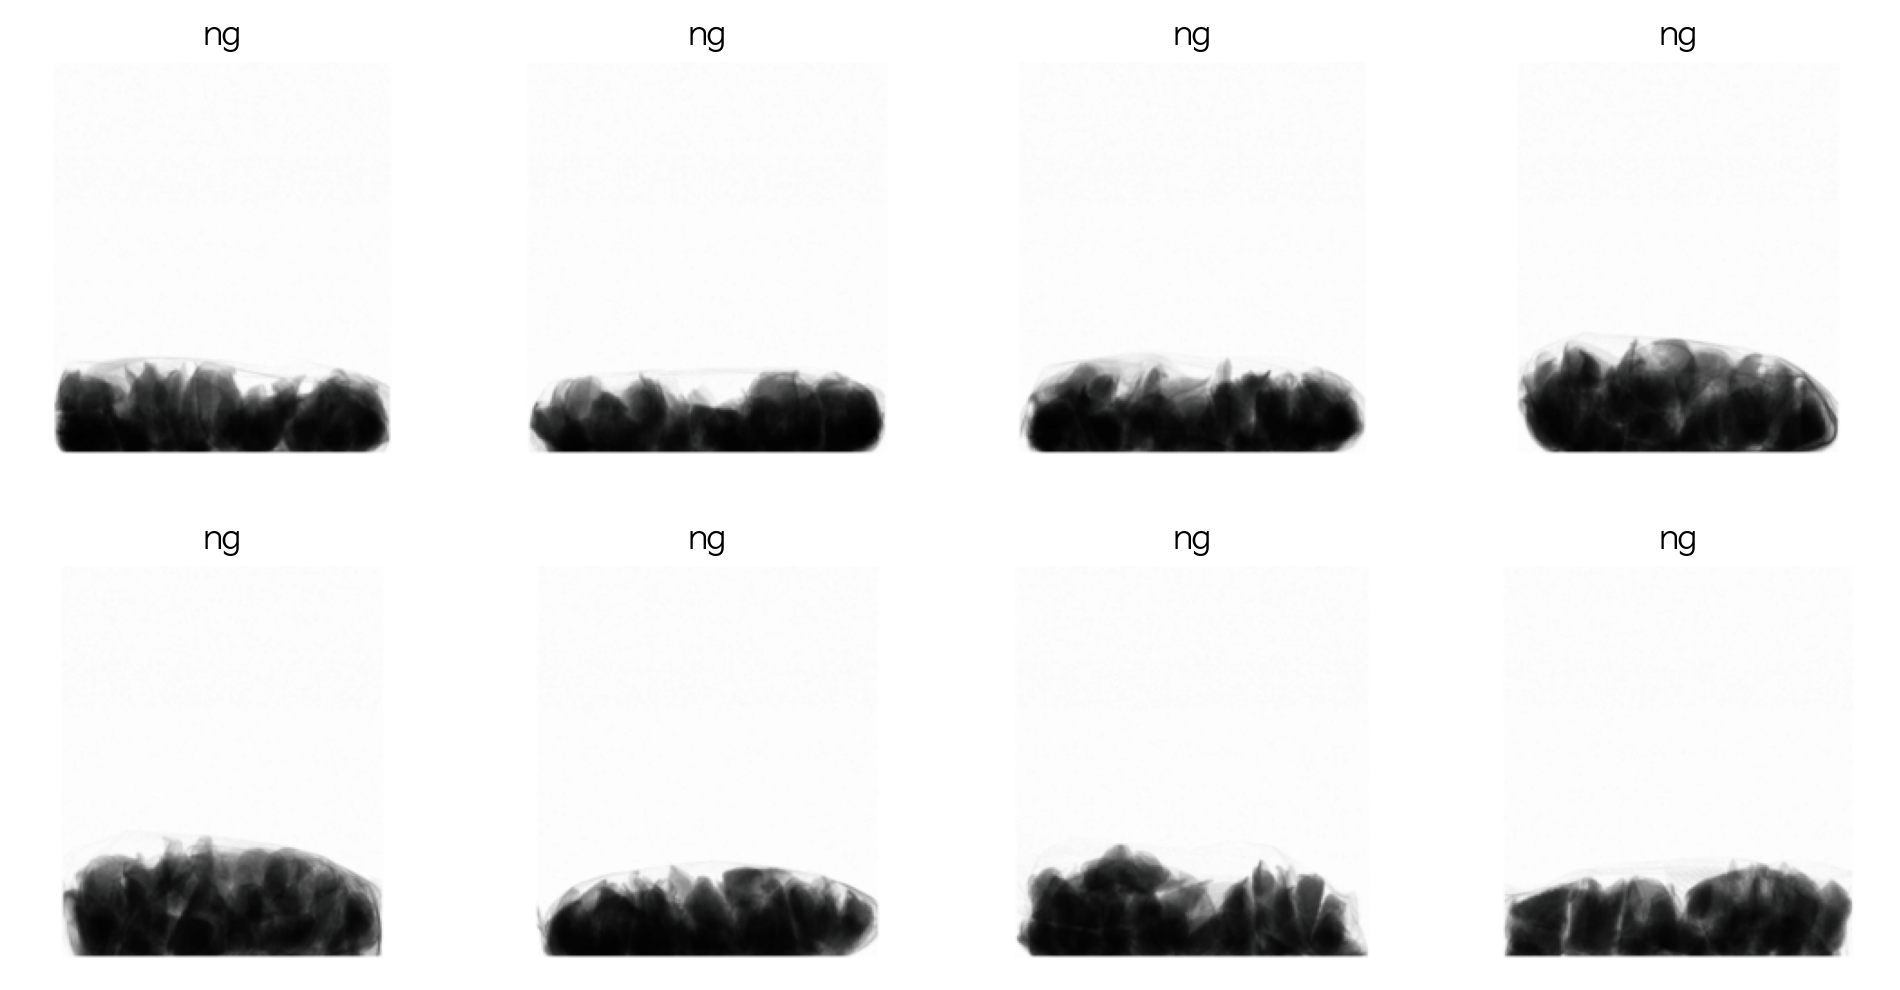

In [13]:
# tfms 를 사용하면 apple mps 오류발생으로 임시 방편

tfms = [Rotate(max_deg=30, p=1.), 
        Zoom(max_zoom=1.1, p=0.5),
        Warp(magnitude=0.2, p=0.5)]


dls = DataBlock(blocks = (ImageBlock, CategoryBlock),
                get_x = ColReader('path', pref = ''), # 이미 경로가 path 열에 정보가 있기 때문에 pref는 '' 빈 정보로
                get_y = ColReader('label'),
                batch_tfms=Normalize.from_stats(*imagenet_stats),
                # batch_tfms = aug_transforms(size = 224),
                splitter=RandomSplitter(valid_pct=0.2, seed=42),
                item_tfms = [Resize(224)])

dls = dls.dataloaders(df, bs=16)

dls.show_batch(max_n=8)


# ## Train the model

In [15]:
from torchvision.models import resnext101_32x8d

# model = resnext101_32x8d(pretrained=True)
model = resnet101

learn = vision_learner(dls, model, metrics=[accuracy, error_rate])
learn.fine_tune(10, freeze_epochs=5)


Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /Users/kimsy/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:02<00:00, 60.1MB/s] 


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.107355,1.199879,0.451087,0.548913,04:24


In [ ]:
# 결과 예측
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
# 틀린 이미지 출력
interp.plot_top_losses(5, nrows=5)

In [ ]:
learn.save('ResNeXt101_32X8D_Weights')

In [9]:
import torch, torchvision, torchtext
torch.__version__, torchvision.__version__, torchtext.__version__

('2.0.1', '0.16.0.dev20230721', '0.5.0')

In [ ]:
import torch, torchvision, torchtext
torch.__version__, torchvision.__version__, torchtext.__version__

print(torch.backends.mps.is_built())

In [ ]:
a = torch.tensor([1,2,3,4,5]).to('mps')

In [ ]:
torch.backends.mps.is_available()

In [10]:
import fastai

print(fastai.__version__
      )

2.7.12


In [11]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224), num_workers=0)

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.169802,0.022971,0.009472,01:01


epoch,train_loss,valid_loss,error_rate,time
0,0.058867,0.022573,0.006766,01:22
